<center><h3> Fashion MNIST Clothing Item Classification </h3>
    <h7>Sita Robinson</h7> </center>

<h4>Background:</h4>
The Fashion MNIST dataset consists of a training set with 60,000 images and a test set with 10,000.  Each image is a 28x28 grayscale image associated with a label from 10 classes.

<h4>Purpose:</h4>
Use deep learning methods with Tensorflow and Keras to classify clothing items from images.

<hr>

<h4> Exploration:</h4>

Importing libraries

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import pydot as pyd
import keras
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
keras.utils.vis_utils.pydot = pyd

Loading the data and dividing it into test and train

In [31]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

|Class Index | Class Label|
| --- | --- |
|0 | T-shirt/top |
|1| Trouser| 
|2| Pullover| 
|3| Dress| 
|4| Coat |
|5| Sandal |
|6| Shirt |
|7| Sneaker |
|8| Bag|
|9| Ankle boot|

Class name labels

In [32]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

There are 60000 images in the train set that are of size 28x28 pixels.

In [33]:
train_images.shape

(60000, 28, 28)

There are 60000 train labels

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

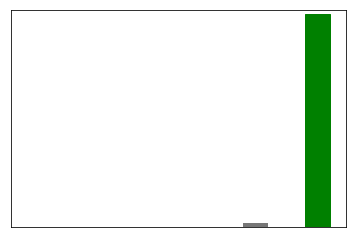

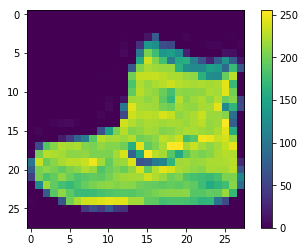

In [36]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

There are 10000 images in the test set that are of size 28x28 pixels.

In [37]:
test_images.shape

(10000, 28, 28)

There are 10000 test labels

In [38]:
len(test_labels)

10000

The labels show a numerical code for each clothing item.

In [39]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

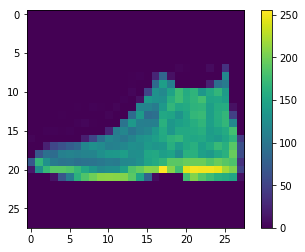

In [40]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Printing out first 50 images with their labels

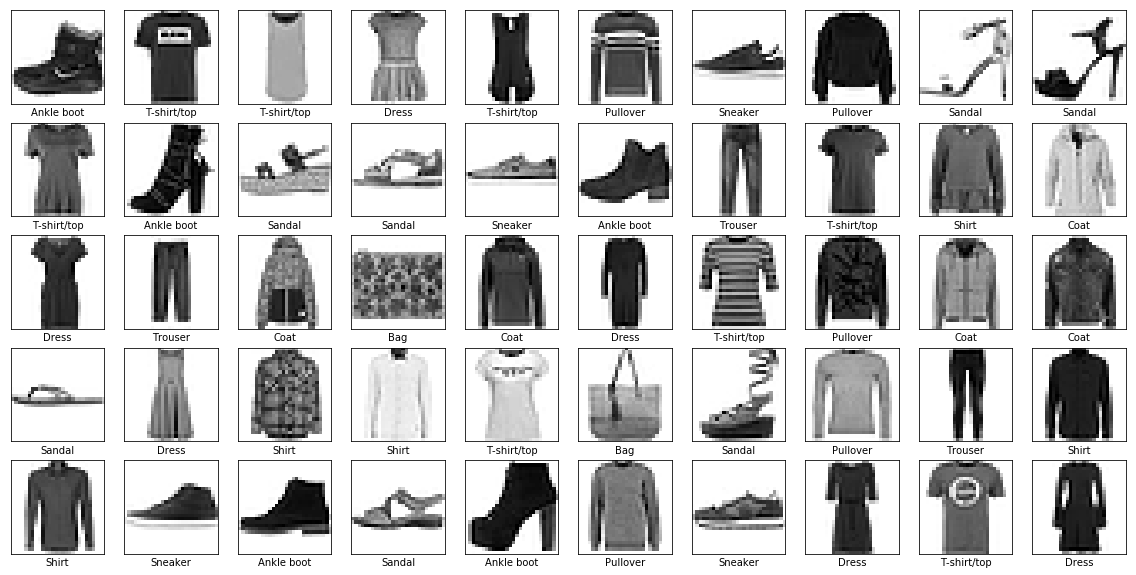

In [42]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

<h4> Modeling:</h4>

Sequential Model

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Visualizing the model

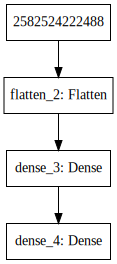

In [44]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
60000/60000 [==============================] - 8s 135us/step - loss: 0.4940 - acc: 0.8279
Epoch 2/8
60000/60000 [==============================] - 8s 131us/step - loss: 0.3746 - acc: 0.8648
Epoch 3/8
60000/60000 [==============================] - 8s 134us/step - loss: 0.3371 - acc: 0.8770
Epoch 4/8
60000/60000 [==============================] - 9s 152us/step - loss: 0.3128 - acc: 0.8835
Epoch 5/8
60000/60000 [==============================] - 8s 135us/step - loss: 0.2960 - acc: 0.8910
Epoch 6/8
60000/60000 [==============================] - 8s 129us/step - loss: 0.2775 - acc: 0.8969
Epoch 7/8
60000/60000 [==============================] - 7s 113us/step - loss: 0.2676 - acc: 0.8992
Epoch 8/8
60000/60000 [==============================] - 7s 109us/step - loss: 0.2541 - acc: 0.9059


The test accuracy is around 88%

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy: 0.879


In [48]:
predictions = model.predict(test_images)

In [49]:
predictions[0]

array([1.85075122e-09, 3.39444063e-11, 1.60806105e-10, 3.67172161e-11,
       1.08506193e-09, 2.58496800e-03, 1.02449285e-08, 1.89320557e-02,
       1.24640529e-08, 9.78482962e-01], dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [51]:
test_labels[0]

9

In [52]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label], 100*np.max(predictions_array), classes[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

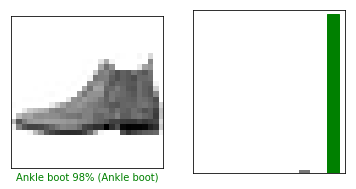

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

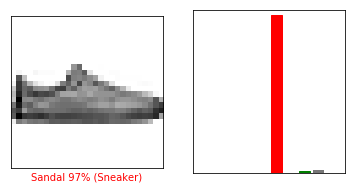

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [55]:
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.8507584e-09 3.3944406e-11 1.6080640e-10 3.6717358e-11 1.0850661e-09
  2.5849692e-03 1.0244949e-08 1.8932052e-02 1.2464101e-08 9.7848296e-01]]


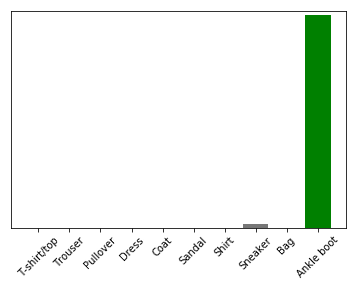

In [58]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), classes, rotation=45)
plt.show()

In [59]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


The images printed out with red labels were incorrectly classified.  The correctly classification is in parentheses after the prediction.  

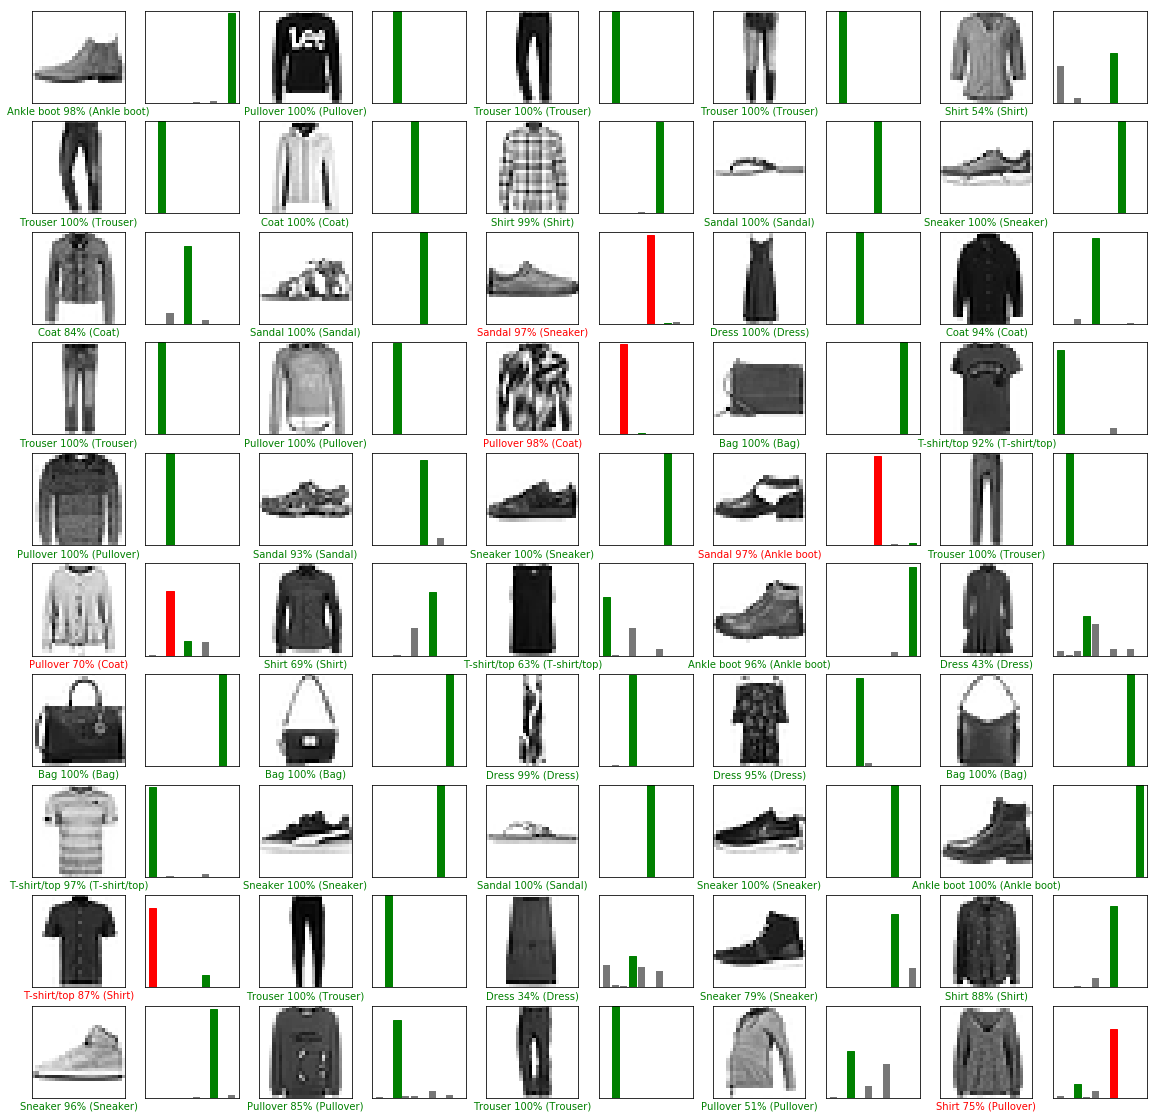

In [60]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()